
# Logistic Regression
---

### It is a statistical model that can be used to model a binary dependent variable using the logistic function.


In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

#### The sigmoid or logistic function is a function that squeezes the input value to fit between 0 and 1.

#### NOTE: This makes it useful for probabilities :)

\begin{align}
Logistic(x) = \frac{1}{1 + e^{-x}} 
\end{align}

In [2]:
def plot_sigmoid(min, max):
    import matplotlib.pyplot as plt 
    import numpy as np 

    z = np.linspace(min, max, 100) 
    def sigmoid(z):
        return 1/(1 + np.exp(-z))

    a = sigmoid(z)
    plt.plot(z, a) 
    plt.xlabel("z") 
    plt.ylabel("sigmoid(z)")

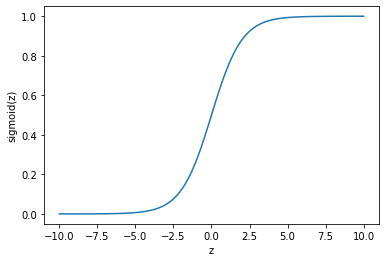

In [3]:
plot_sigmoid(-10, 10)

#### The Cross Entropy loss function is a loss function that measures the performance of a classification model.

\begin{align}
Loss(true, pred) = - true*log(pred) + (1-true) * log(1-pred)
\end{align}

##### Suppose now if the true value is 1, the second term gets cancelled and we're left with -log(pred), which is zero if the prediction is 1.
##### If now we have true value as 0, the first term is cancelled, and we again get zero loss in case of predicted value also being zero.


#### Now, our two input vectors will be of the shape (m x 1).
\begin{align}
y_{true}=\begin{bmatrix}
y_1\\y_2\\y_3\\y_4\\...\\y_m
\end{bmatrix}
y_{pred}=\begin{bmatrix}
p_1\\p_2\\p_3\\p_4\\...\\p_m
\end{bmatrix}
\end{align}
where each y_i is the true class for the ith example, and each p_i is the predicted class for ith example.


####To calculate the loss for all examples at once, if we had to do it mindlessly, we would just run a loop to calculate over each example and then add it together. But, we use the beauty of vectors!

#### We could even use the Hadamard product and then sum all of them together, but if we want to use the dot product, we need the **columns of the first vector** to be equal to the **rows of the second vector**.

#### So, naturally, we calculate the transpose of the y_true vector and apply the log operation to the y_pred vector

\begin{align}
y_{true}^T = \begin{bmatrix}
y_1 & y_2 & y_3 & y_4 & ... & y_m
\end{bmatrix}\quad
y_{pred} =log(\begin{bmatrix}
p_1\\p_2\\p_3\\p_4\\...\\p_m
\end{bmatrix})
\end{align}

#### Now, the dot product of them would be
\begin{align}
y_{true}^T ⋅ y_{pred} = y_1 * log(p_1) + y_2 * log(p_2) + y_3 * log(p_3) + \newline ... + y_m * log(p_m)
\end{align}

#### As can be seen, this is perfect and exactly what we want! The same can be done for the second term in the loss.
#### And to average the total loss, we divide it by m (the number of examples). This gives us the **cost function**.

#### **NOTE: it may seem that adding up only the first term of the losses first would change the result, but if you actually analyze it, you can find that it makes no difference whether we calculate the entire loss and sum it up or parts of losses and sum it up, as it is just connected by addition.**

In [4]:
import numpy as np
def cross_entropy_loss(y_true, y_pred):
    """
    INPUTS:
    y_true -> m x 1 dimensional vector
    y_pred -> m x 1 dimensional vector

    OUTPUTS:
    loss -> scalar
    """
    m = y_true.shape[0]
    loss = (-1 / m) * (y_true.T.dot(np.log(y_pred)) + (1 - y_true).T.dot(np.log(1 - y_pred)))
    return loss

In [5]:
def sigmoid(arr):
    """
    Apply sigmoid function to each value in given vector.
    
    INPUTS:
    arr -> matrix/vector

    OUTPUTS:
    arr -> sigmoid applied to arr
    """

    arr = 1 / (1 + np.exp(-arr))
    return arr

In [6]:
def d_sigmoid(arr):
    """
    Apply derivative of sigmoid to given vector.

    INPUTS:
    arr -> matrix/vector

    OUTPUTS:
    arr -> derivative of sigmoid applied to arr
    """

    arr = sigmoid(arr) * (1 - sigmoid(arr))
    return arr

In [7]:
from sklearn.datasets import load_iris

In [8]:
dataset = load_iris()

In [9]:
from pprint import pprint
pprint(dataset.DESCR)

('.. _iris_dataset:\n'
 '\n'
 'Iris plants dataset\n'
 '--------------------\n'
 '\n'
 '**Data Set Characteristics:**\n'
 '\n'
 '    :Number of Instances: 150 (50 in each of three classes)\n'
 '    :Number of Attributes: 4 numeric, predictive attributes and the class\n'
 '    :Attribute Information:\n'
 '        - sepal length in cm\n'
 '        - sepal width in cm\n'
 '        - petal length in cm\n'
 '        - petal width in cm\n'
 '        - class:\n'
 '                - Iris-Setosa\n'
 '                - Iris-Versicolour\n'
 '                - Iris-Virginica\n'
 '                \n'
 '    :Summary Statistics:\n'
 '\n'
 '    ============== ==== ==== ======= ===== ====================\n'
 '                    Min  Max   Mean    SD   Class Correlation\n'
 '    ============== ==== ==== ======= ===== ====================\n'
 '    sepal length:   4.3  7.9   5.84   0.83    0.7826\n'
 '    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n'
 '    petal length:   1.0  6.9   3.76   1.76    

In [10]:
dataset

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [11]:
X = dataset.data
y = dataset.target.reshape(-1, 1)

In [12]:
full_dataset = np.concatenate((X, y), axis = 1)
full_dataset.shape

(150, 5)

In [13]:
import pandas as pd
pd_set = pd.DataFrame(full_dataset, columns = [*dataset.feature_names, "output"])

In [14]:
pd_set = pd_set[pd_set.output != 2]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4718e882d0>,
      dtype=object)

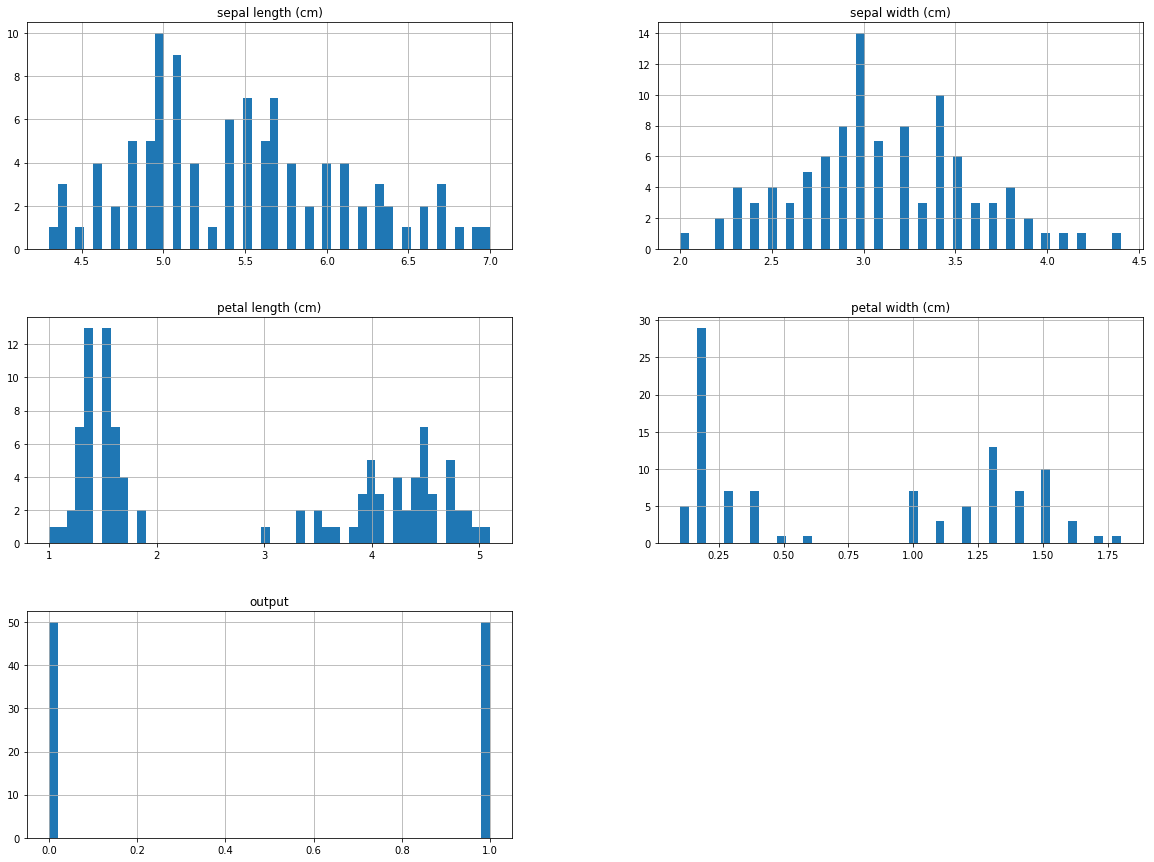

In [15]:
pd_set.hist(bins = 50, figsize = (20, 15))

In [16]:
pd_set.shape

(100, 5)

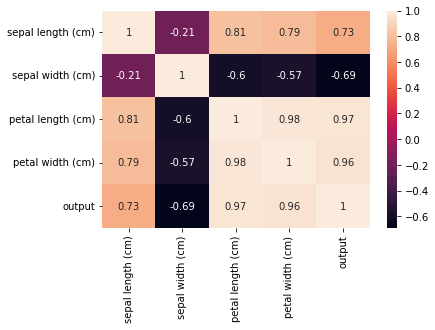

In [17]:
import seaborn as sns
corr_matrix = pd_set.corr()
sns.heatmap(corr_matrix, annot = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f470f820b90>,
      dtype=object)

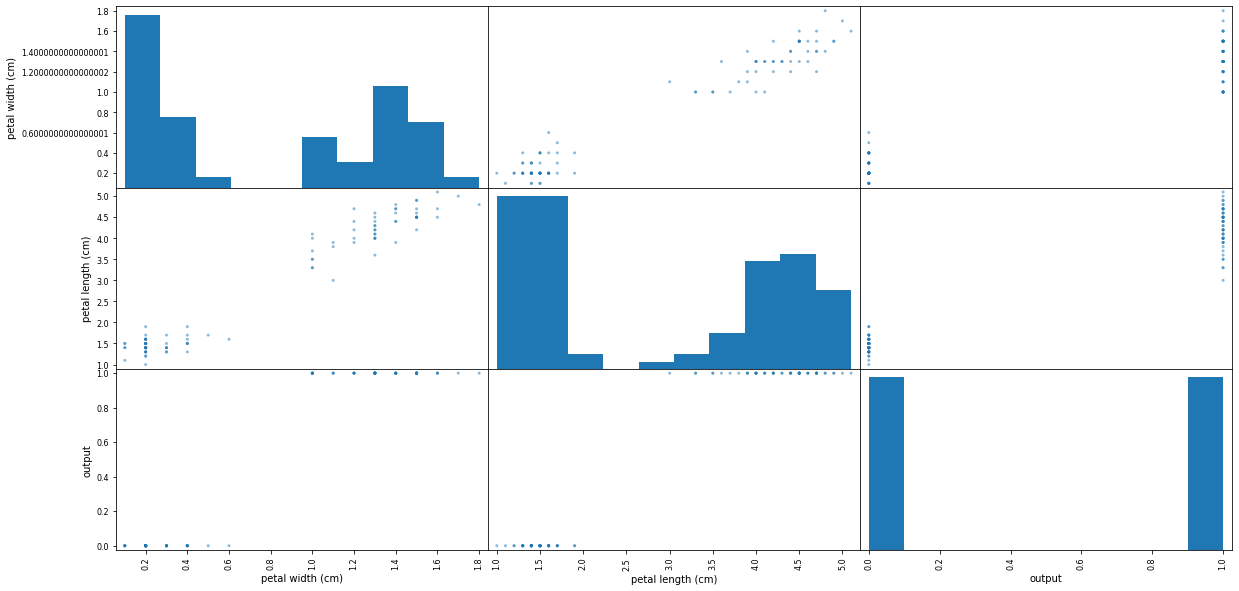

In [18]:
from pandas.plotting import scatter_matrix
attr = ["petal width (cm)", "petal length (cm)", "output"]
scatter_matrix(pd_set[attr], figsize = (20, 10))

In [19]:
X = pd_set.drop(["output", "sepal width (cm)", "sepal length (cm)"], axis = 1).to_numpy()
y = pd_set["output"].to_numpy().reshape(-1, 1)

In [20]:
y.shape

(100, 1)

In [21]:
weights = np.random.normal(size = X.shape[1]).reshape(2, 1)
weights.shape

(2, 1)

In [22]:
preds = sigmoid(X.dot(weights))

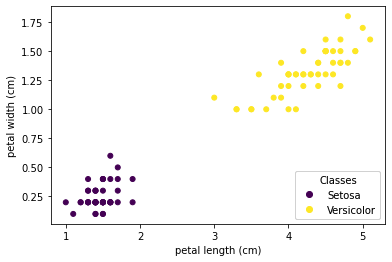

In [23]:
fig, ax = plt.subplots()
scatter = ax.scatter(X[:, 0], X[:, 1], s = 25, c = y, marker = 'o')
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
legends = ax.legend(handles = scatter.legend_elements()[0], labels = ["Setosa", "Versicolor"], loc = "lower right", title = "Classes")
ax.add_artist(legends)
plt.show()

These are our predictions using our initialized weights vector.

In [24]:
preds

array([[0.49037259],
       [0.49037259],
       [0.49089971],
       [0.48984549],
       [0.49037259],
       [0.48654638],
       [0.48924988],
       [0.48984549],
       [0.49037259],
       [0.49096825],
       [0.48984549],
       [0.48931842],
       [0.49149539],
       [0.49307693],
       [0.49142685],
       [0.48760029],
       [0.4886543 ],
       [0.48924988],
       [0.48766881],
       [0.48872283],
       [0.48879136],
       [0.48760029],
       [0.49248118],
       [0.48542409],
       [0.48773734],
       [0.48931842],
       [0.48707332],
       [0.48984549],
       [0.49037259],
       [0.48931842],
       [0.48931842],
       [0.48760029],
       [0.49096825],
       [0.49037259],
       [0.48984549],
       [0.49142685],
       [0.49089971],
       [0.49149539],
       [0.49089971],
       [0.48984549],
       [0.48977695],
       [0.48977695],
       [0.49089971],
       [0.48482875],
       [0.4854926 ],
       [0.48924988],
       [0.48931842],
       [0.490

In [25]:
preds.shape

(100, 1)

In [26]:
loss = cross_entropy_loss(y, preds)
print(loss)

[[0.72155743]]


0.5 is not bad to start with!

Now, with these outputs, we want to calculate the backprop. derivatives.

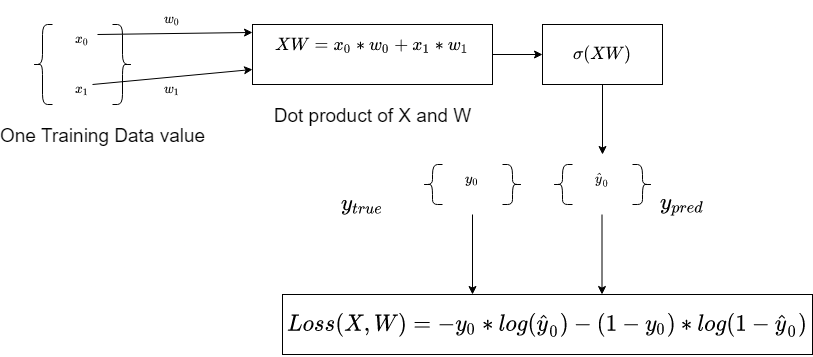



Let us take $$h = XW$$ and $$ g = \sigma(XW)$$

### First, we will calculate:
\begin{align}
\frac{\partial Loss(X,W)}{\partial g} = \frac{\partial( -y_0 * log(\hat y_0) - (1 - y_0) * log(1 - \hat y_0))}{\partial g} \newline
= \frac{\partial(-y_0 * log(g) - (1 - y_0) * log(1 - g))}{\partial g}\newline
= - \frac{\partial(y_0 * log(g))}{\partial g} - \frac{\partial((1 - y_0) * log(1 - g))}{\partial g} \newline
= - \frac{y_0}{g} + \frac{1 - y_0}{1 - g} \newline 
= \frac{g - y_0}{g(1-g)}
\end{align}

In [27]:
preds.shape

(100, 1)

In [28]:
dlossdg = (preds - y) / (preds * (1 - preds))
print(dlossdg.shape)

(100, 1)


###Now, we calculate:
\begin{align}
\frac{\partial g}{\partial h} = \sigma(h) * 1 - \sigma(h) = g(1 - g)
\end{align}

In [29]:
dgdh = preds * (1 - preds)

### And finally, we calculate:
\begin{align}
\frac{\partial h}{\partial w} = X
\end{align}

### Adding all of these, we get:
\begin{align}
\frac{\partial Loss(X, W)}{\partial w} = \frac{\partial Loss(X, W)}{\partial g} * \frac{\partial g}{\partial h} * \frac{\partial h}{\partial w} \newline 
= \frac{g - y_0}{g(1-g)} * g(1-g) * X \newline
= X^{T} * (g-y_0)
\end{align}

In [30]:
dlossdw = X.T.dot(preds - y)
print(dlossdw)

[[-78.76483652]
 [-29.64859887]]


There we go! Those are our partial derivatives for the loss with respect to the weights.

They can be interpreted as **levers** that tell you which way you should move to decrease the loss. As our derivatives are -ve, that tells us that if we go on increasing the weights, the loss will decrease.

Before we move on to training a model, we must first divide the data into train and test samples.

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [32]:
class LogisticRegression():
    def __init__(self, lr = 0.001, epochs = 10, reg_param = 0.01):
        """
        Initialize model with learning rate, epochs, and regularization parameter.
        """
        self.lr = lr
        self.epochs = epochs
        self.reg_param = reg_param

    def gd_fit_vectorized(self, X_train, y_train, plot_loss = False, regularization = False):
        m = X_train.shape[0]
        self.w = np.random.normal(size = X.shape[1]).reshape(2, 1)
        losses = []
        epochs = []
        for i in range(epochs):
            fwd = self.predict(X_train)
            dlossdw = (X_train.T.dot(fwd - y_train)) / m
            self.w = self.w - (self.lr * dlossdw)
            loss = cross_entropy_loss(y_train, preds)
            if regularization:
                self.w -= (self.reg_param / m) * self.w
            if plot_loss:
                losses.append(loss)
                epochs.append(i)

        if plot_loss:
            plt.plot(epochs, losses)
            plt.show()

        print("The weights are: ", self.w)

    def predict(self, X_test):
        preds = sigmoid(X_test.dot(self.w))
        return preds